### IMPORTING ALL LIBRARIES

In [1]:
import pandas as pd
import numpy as np

terr_data = pd.read_csv("Global Terrorism - START data.zip",encoding = "ISO-8859-1", low_memory=False)

In [2]:
terr_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terr_data.shape

(181691, 135)

In [4]:
terr_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### RENAMING SPECIFIC COLUMNS 

In [5]:
terr_data.rename(columns = {'iyear':'year', 'imonth':'month','iday':'day','country_txt':'country_place','scite1':'attack','scite2':'attack1','scite3':'attack2'}, inplace = True)
terr_data.head(1)

,eventid,year,month,day,approxdate,extended,resolution,country,country_place,region,...,addnotes,attack,attack1,attack2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [6]:
print("Unique values in eventid is {} and in country is {}".format(terr_data["eventid"].nunique(),terr_data["country"].nunique()))

Unique values in eventid is 181691 and in country is 205


### FILLING NAN VALUES 

In [7]:
terr_data['approxdate'] = terr_data['approxdate'].fillna(0)

In [8]:
terr_data['resolution'] = terr_data['resolution'].fillna("--")

In [9]:
terr_data['addnotes'] = terr_data['addnotes'].fillna("no data")
terr_data.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country_place,region,...,addnotes,attack,attack1,attack2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,--,58,Dominican Republic,2,...,no data,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,0,0,--,130,Mexico,1,...,no data,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,0,0,--,160,Philippines,5,...,no data,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,0,0,--,78,Greece,8,...,no data,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,0,--,101,Japan,4,...,no data,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
terr_data['attack'] = terr_data['attack'].fillna("null")

In [11]:
terr_data['attack1'] = terr_data['attack1'].fillna("other")

In [12]:
terr_data['attack2'] = terr_data['attack2'].fillna("other")

In [13]:
terr_data.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country_place,region,...,addnotes,attack,attack1,attack2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,--,58,Dominican Republic,2,...,no data,null,other,other,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,0,0,--,130,Mexico,1,...,no data,null,other,other,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,0,0,--,160,Philippines,5,...,no data,null,other,other,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,0,0,--,78,Greece,8,...,no data,null,other,other,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,0,--,101,Japan,4,...,no data,null,other,other,PGIS,-9,-9,1,1,NaN


In [14]:
terr_data.isnull().sum()

eventid            0
year               0
month              0
day                0
approxdate         0
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [15]:
#as it showing related column is full of null values so filling it with some random data

terr_data['related'] = terr_data['related'].fillna("2")

In [16]:
terr_data.head(4)

,eventid,year,month,day,approxdate,extended,resolution,country,country_place,region,...,addnotes,attack,attack1,attack2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,--,58,Dominican Republic,2,...,no data,null,other,other,PGIS,0,0,0,0,2
1,197000000002,1970,0,0,0,0,--,130,Mexico,1,...,no data,null,other,other,PGIS,0,1,1,1,2
2,197001000001,1970,1,0,0,0,--,160,Philippines,5,...,no data,null,other,other,PGIS,-9,-9,1,1,2
3,197001000002,1970,1,0,0,0,--,78,Greece,8,...,no data,null,other,other,PGIS,-9,-9,1,1,2


In [17]:
terr_data['country_place'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [18]:
terr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [19]:
terr_data.describe()

,eventid,year,month,day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Checking mean values in specific column by using group_by function

In [20]:
terr_data.groupby(['country_place']).mean().head(4)

,eventid,year,month,day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
country_place,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.012887e+11,2012.819260,6.604509,15.774723,0.072657,4.0,6.0,33.878726,67.191111,2.086724,...,2.702768e+06,6.111111e+03,2569.738000,555.555556,4.985689,-32.829535,-3.427618,-3.325348,0.142801,-2.565549
Albania,1.999129e+11,1999.062500,6.512500,17.037500,0.000000,5.0,9.0,41.077462,19.838797,1.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-0.112500,-7.875000
Algeria,2.000576e+11,2000.509296,6.478308,15.200146,0.032446,6.0,10.0,36.223004,3.397750,1.372949,...,1.778367e+06,2.133327e+06,250921.583333,-14.142857,5.113475,-35.610169,-5.107546,-5.102807,-0.026613,-4.858549
Andorra,1.974071e+11,1974.000000,7.000000,14.000000,0.000000,7.0,8.0,NaN,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000


In [21]:
terr_data.groupby(['weaptype1_txt']).mean().head(4)

,eventid,year,month,day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
weaptype1_txt,,,,,,,,,,,,,,,,,,,,,
Biological,1.999230e+11,1999.142857,8.571429,14.742857,0.057143,210.685714,3.028571,33.319696,-49.524213,1.228571,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.628571,-6.542857,0.057143,-6.485714
Chemical,2.002900e+11,2002.838006,6.080997,13.803738,0.003115,117.239875,6.894081,27.500675,36.294964,1.610592,...,NaN,NaN,NaN,NaN,4.666667,-15.666667,-4.925234,-4.816199,0.109034,-3.925234
Explosives,2.004200e+11,2004.133436,6.463030,15.594519,0.003679,126.542315,7.456971,25.226616,30.915416,1.366420,...,1.103738e+07,-14.142857,63861.663636,-14.142857,4.658257,-18.050602,-5.002975,-4.914310,0.090137,-4.427120
Fake Weapons,1.997174e+11,1997.121212,5.090909,14.333333,0.060606,128.878788,6.363636,29.919133,15.871436,1.242424,...,6.410656e+05,0.000000,388.800000,0.000000,3.545455,77.666667,-5.878788,-5.818182,0.060606,-3.666667


### DATA VISUALIZATION

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='yearY', ylabel='count'>

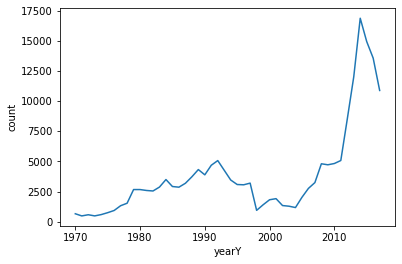

In [23]:
# New Code 01

y_count = pd.DataFrame(terr_data['year'].value_counts(dropna = False).sort_index()).reset_index()
y_count.rename(columns = {'index':'yearY', 'year':'count'}, inplace = True)
sns.lineplot(x= 'yearY', y= 'count', data=y_count)

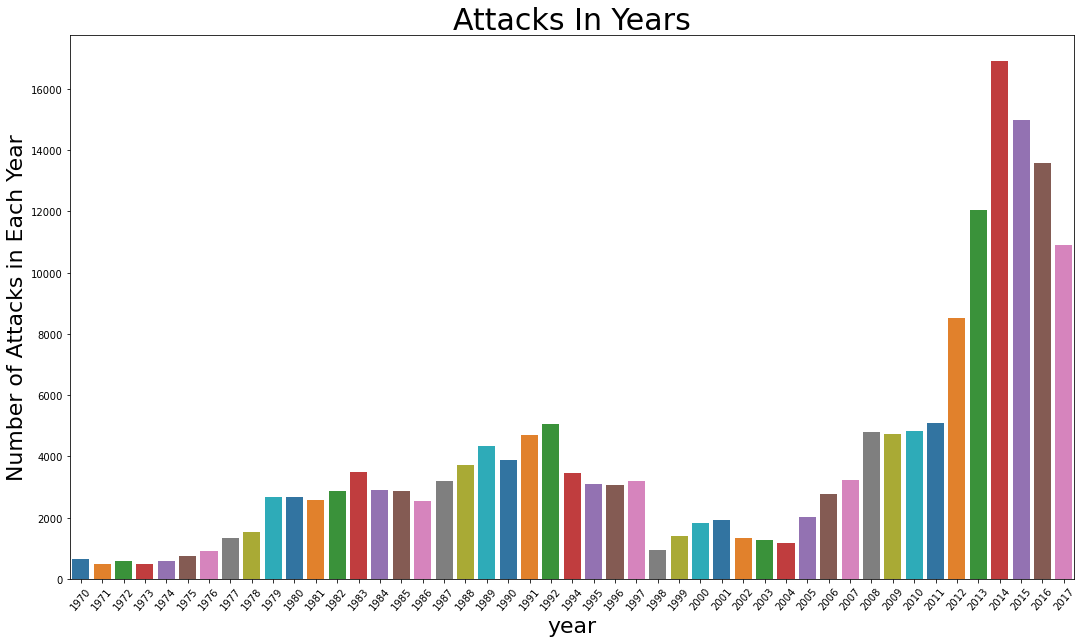

In [24]:
y = terr_data['year'].unique()
y_count = terr_data['year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = y, y = y_count, palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('year',fontsize=22)
plt.ylabel('Number of Attacks in Each Year',fontsize=22)
plt.title('Attacks In Years',fontsize=30)
plt.show()

<AxesSubplot:xlabel='weaptype1_txt', ylabel='country'>

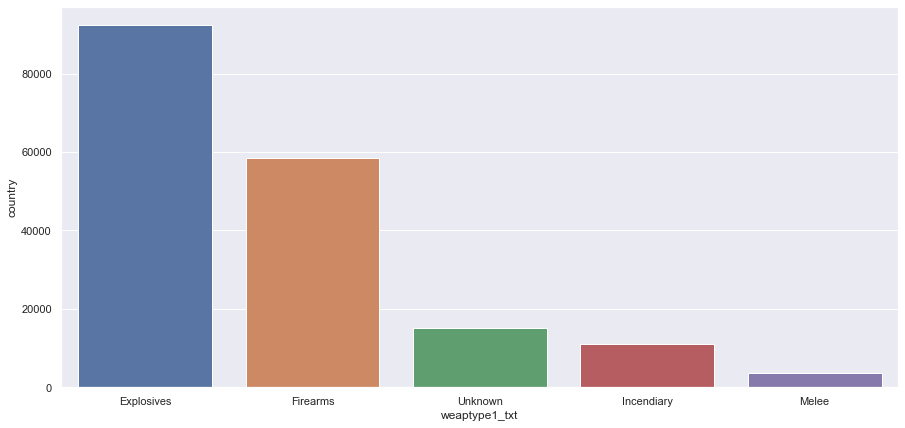

In [25]:
new_Attack_DF = pd.DataFrame(terr_data['country'].groupby(terr_data['weaptype1_txt']).count()).reset_index()
atk_data_plot = new_Attack_DF.sort_values('country',ascending=False).head(5).reset_index()

# Randomly reorder the data to make it qualitative
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='weaptype1_txt', y='country', data=atk_data_plot)
# plt.figure(figsize=(20,10))

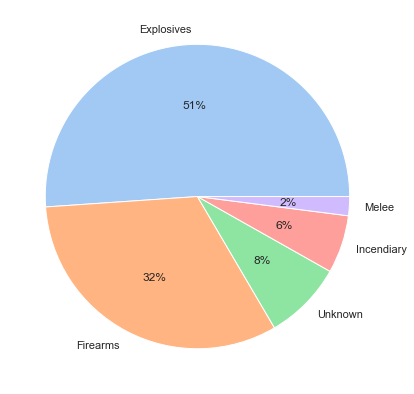

In [26]:
labels = atk_data_plot['weaptype1_txt']
x = atk_data_plot['country']
explode = [0, 0, 0, 0, 0]
colors = sns.color_palette('pastel')
# plt.pie(x, labels = labels, colors = colors)
# plt.show()
plt.pie(x, labels=labels, colors=colors, explode=explode, autopct='%.0f%%')
plt.show()